<a href="https://colab.research.google.com/github/Harsh-Mital/UBER-EDA/blob/main/UBER_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/My Uber Drives - 2016.csv')

In [3]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
data.describe()

,MILES*
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
data.isnull().sum()

,0
START_DATE*,0
END_DATE*,1
CATEGORY*,1
START*,1
STOP*,1
MILES*,0
PURPOSE*,503


In [7]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
1151,False
1152,False
1153,False
1154,False


In [8]:
data['PURPOSE*'].fillna('NOT',inplace=True)

/tmp/ipython-input-2263751486.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PURPOSE*'].fillna('NOT',inplace=True)


In [9]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [10]:
data['START_DATE*']=pd.to_datetime(data['START_DATE*'],errors='coerce')
data['END_DATE*']=pd.to_datetime(data['END_DATE*'],errors='coerce')

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   datetime64[ns]
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1156 non-null   float64       
 6   PURPOSE*     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [12]:
from datetime import datetime
data['date']=pd.DatetimeIndex(data['START_DATE*']).date
data['time']=pd.DatetimeIndex(data['START_DATE*']).hour

In [13]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0


In [14]:
data['day-night']=pd.cut(x=data['time'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'])

In [15]:
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon


In [16]:
data.dropna(inplace=True)

In [17]:
data.shape

(1136, 10)

<Axes: xlabel='count', ylabel='CATEGORY*'>

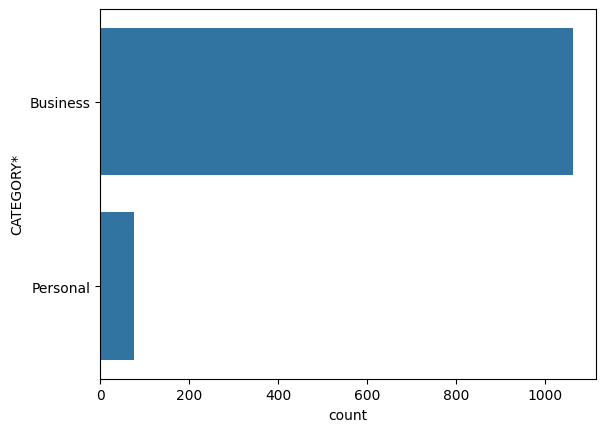

In [18]:
sns.countplot(data['CATEGORY*'])

<Axes: xlabel='count', ylabel='PURPOSE*'>

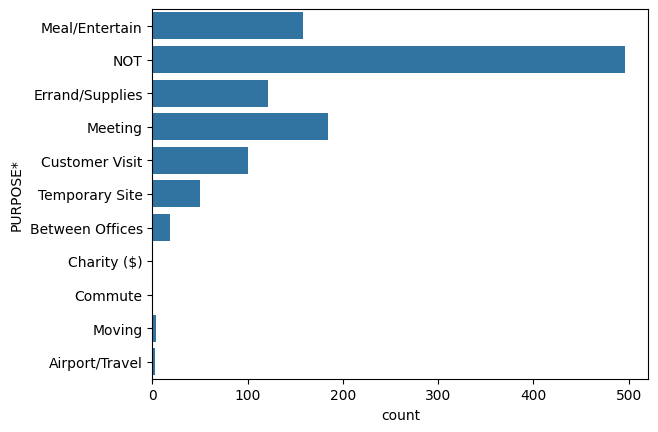

In [19]:
sns.countplot(data['PURPOSE*'])

<Axes: xlabel='count', ylabel='day-night'>

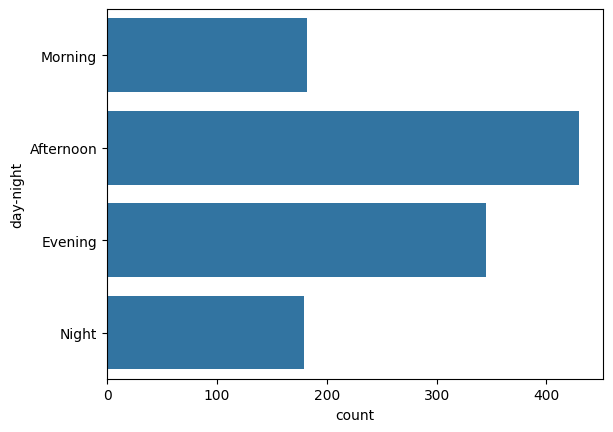

In [20]:
sns.countplot(data['day-night'])

In [21]:
data['month']=data['START_DATE*'].dt.month_name()
monthly_miles = data.groupby("month")["MILES*"].sum()
monthly_miles = monthly_miles.reindex([
    "January","February","March","April","May","June",
    "July","August","September","October","November","December"
]).dropna()
print(monthly_miles)

month
January       504.9
February      906.4
March        1690.1
April        1105.0
May           359.1
June          825.9
July         1182.0
August       1335.5
September     601.8
October      1798.2
November      816.9
December      976.9
Name: MILES*, dtype: float64


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

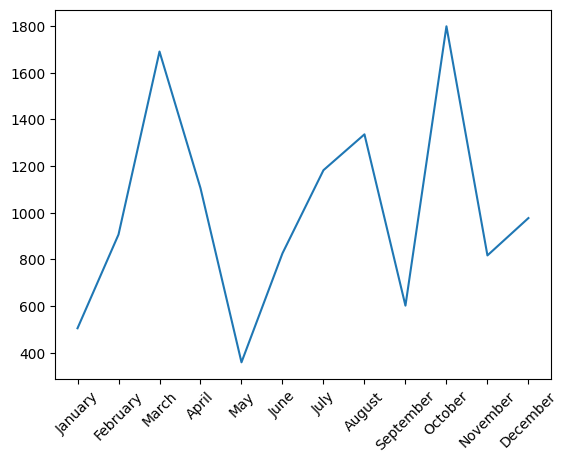

In [22]:
plt.plot(monthly_miles.index, monthly_miles.values)
plt.xticks(rotation=45)

In [23]:
data['day']=data['START_DATE*'].dt.day_name()
data.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,date,time,day-night,month,day
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,January,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,January,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,January,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,January,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,Afternoon,January,Wednesday


([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Friday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Monday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Saturday'),
  Text(5, 0, 'Wednesday'),
  Text(6, 0, 'Sunday')])

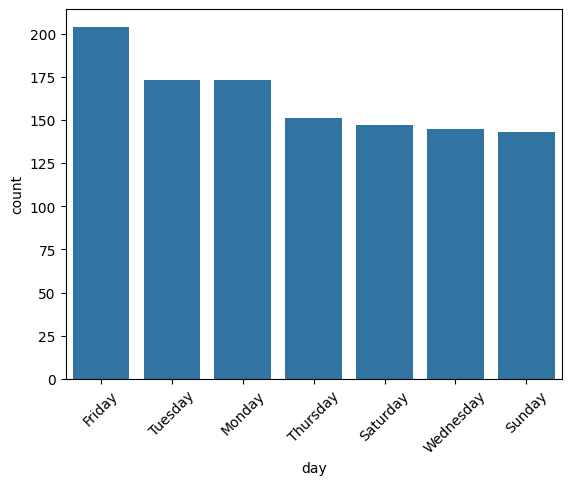

In [24]:
day_label=data['day'].value_counts()
sns.barplot(x=day_label.index,y=day_label)
plt.xticks(rotation=45)

/tmp/ipython-input-3003658599.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

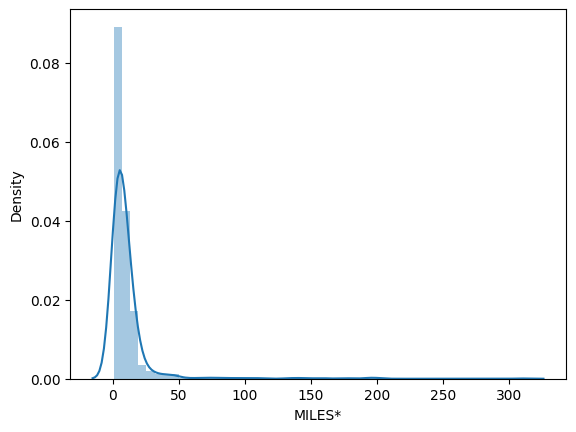

In [25]:
sns.distplot(data['MILES*'])

/tmp/ipython-input-4235094481.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data[data['MILES*']<50]['MILES*'])


<Axes: xlabel='MILES*', ylabel='Density'>

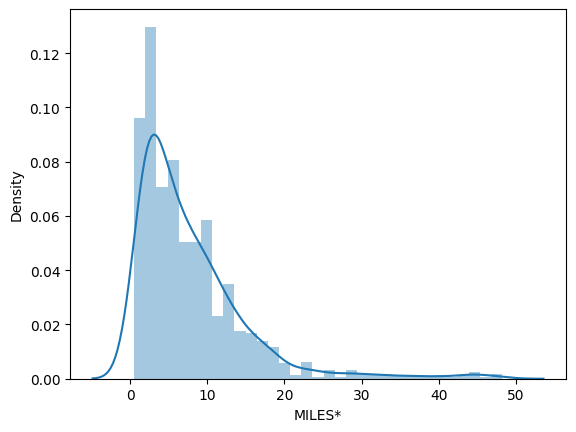

In [26]:
sns.distplot(data[data['MILES*']<50]['MILES*'])

# Findings
1: Highest category for which rides booked?

*Ans: Business*


2: For which purpose uber most used?

*Ans: Meeting, NOT is defined by us for na values.*


3: At what time of day do people use cabs most?

*Ans: Afternoon*


4: In which month does uber is driven least?

*Ans: May with 359.1 Miles.*

5: Which day of the week Uber booked most?

*Ans: Friday*


6: Highest no of miles distance booked by users?

*Ans: For 0-10 Miles distance, uber is booked most.*